In [47]:
import pandas as pd
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
from transformers import pipeline
import snscrape.modules.twitter as sntwitter
from tqdm import tqdm
from datetime import datetime
from wordcloud import WordCloud
import numpy as np

In [14]:
def scrape(search_term, start, end):
    # Creating list to append tweet data to
    tweets_list2 = []
    # Using TwitterSearchScraper to scrape data and append tweets to list
    ##yyyy-mm-dd
    for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper(search_term + ' since:'+start+' until:'+end).get_items())):
        if i>50000:
            break
        tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.user.followersCount, tweet.user.favouritesCount, tweet.user.location, tweet.user.friendsCount, tweet.retweetCount, tweet.likeCount, tweet.replyCount, tweet.hashtags])

    # Creating a dataframe from the tweets list above
    df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Followers', 'Favourites', 'Location','Friends','Retweets', 'Tweet Likes', 'Tweet Replies', 'Hashtags'])
#     df['date'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %X%z')
#     df['week'] = df.apply(lambda row: int(datetime.date(row.date).strftime("%V")) + int(row.Datetime[3])*52, axis=1)
    return df2

In [23]:
df = scrape('feta pasta', '2020-12-01', '2021-06-25')

26489it [06:24, 68.96it/s]


In [24]:
df

,Datetime,Tweet Id,Text,Username,Followers,Favourites,Location,Friends,Retweets,Tweet Likes,Tweet Replies,Hashtags
0,2021-06-24 22:58:17+00:00,1408197816443457541,Garlic scape pesto pasta with leftovers. (Chic...,purlewe,594,128100,Philly,213,0,4,0,None
1,2021-06-24 22:23:04+00:00,1408188956127211523,Every time i make the feta pasta I’m so amazed...,amelia_vro,125,6737,New England,497,0,1,0,None
2,2021-06-24 21:58:38+00:00,1408182806119911425,"If you’re not active on TikTok, it’s easy to a...",newslogged,1,2,India,0,0,0,0,None
3,2021-06-24 21:30:00+00:00,1408175600385204227,#RecipeOfTheDay: Tomato Feta Pasta Salad @greg...,PreviewNow,15004,146,"Houston, TX",741,0,1,0,"[RecipeOfTheDay, recipe]"
4,2021-06-24 20:57:26+00:00,1408167406342639616,Veggie Pasta with Baked Feta\n\nhttps://t.co/m...,womaneasy,446,1,United States,33,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
26484,2020-12-01 20:14:15+00:00,1333867024498487307,Authentic Greek Pastitsio...💃🏼🤌\n#greek #pasti...,InkedDeviant,527,11186,,986,1,0,0,"[greek, pastitsio, feta, beef, pasta, onion, g..."
26485,2020-12-01 15:09:12+00:00,1333790258052284416,"Pork and leek sausages, fish risotto or tri pa...",ThomasHalliwell,24,287,"Holt, England",20,0,3,0,None
26486,2020-12-01 14:54:50+00:00,1333786640381210630,Krissen feta-tomaatti-pasta on mielettömän hyv...,lomalla2020,1,8,,0,0,4,4,[bbsuomi]
26487,2020-12-01 04:47:39+00:00,1333633839382499329,Bursting with Happiness Tomatoes and Feta Past...,chophappy,3512,51757,New York City,2757,0,0,0,None


In [44]:
df['week'] = df.apply(lambda row: int(row.Datetime.strftime("%V")) + int(row.Datetime.strftime("%y")[1])*52, axis=1)

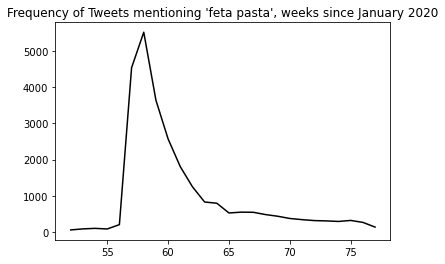

Max at week 58, 2nd week of February


In [62]:
plt.plot(np.linspace(52,77,26), [len(df[df['week']==i]) for i in range(52,78)], c='black')
plt.title('Frequency of Tweets mentioning \'feta pasta\', weeks since January 2020')
plt.show()
print('Max at week 58, 2nd week of February')